[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/y-akbal/Tedu_Computational_Statistics/blob/main/13/ADA402-Final-ALE.ipynb)

In [4]:
import numpy as np
import scipy
from scipy import stats
from matplotlib import pyplot as plt

## 1) Use Metropolis-Hasting Sampler to sample from the random varible with pdf given by 
## $$f(x) = \frac{x^2 e^{-x}}{2}.$$
## for $x > 0$.
## Choose your proposal distribution as $g(.|X_t) = \chi^2(X_t)$, save your sample in an list.

In [101]:
f = lambda x: (np.power(x, 2) * np.exp(-x)) / 2
f2 = lambda x_t: stats.chi2(x_t)

chain = [1]
for i in range(30000):
    proposal_dist = f2(chain[-1])
    Y = proposal_dist.rvs()
    U = np.random.rand()
    ratio = (f(Y) * f2(Y).pdf(chain[-1])) / (f(chain[-1]) * proposal_dist.pdf(Y))
    if U <= ratio:
        chain.append(Y)
    else:
        chain.append(chain[-1])


## 2) See here https://en.wikipedia.org/wiki/Gamma_distribution to decide which Gamma distribution is the above distribution?
## Pick up the right gamma distribution from stats.gamma, sketch its pdf  together with histogram of your sample to compare your findings.

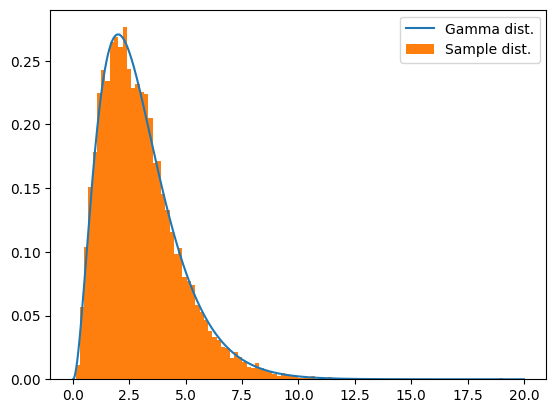

In [102]:
from scipy.stats import gamma
k = 3
t = 1
gamma_dist = stats.gamma(a = k, scale = t)

sample = np.linspace(0, 20, 10000)
plt.plot(sample, gamma_dist.pdf(sample), label="Gamma dist.")
plt.hist(chain, density = True, bins= 100, label= "Sample dist.")
plt.legend()
plt.show()

## 3) Sketch QQ-plot of your a sample from the right Gamma distributions to see if your sample is reliable.
## See here for QQ plots: https://www.statsmodels.org/dev/generated/statsmodels.graphics.gofplots.qqplot_2samples.html

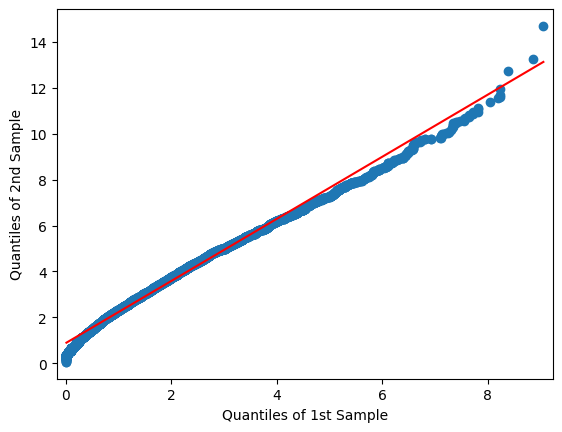

In [114]:
from statsmodels.graphics.gofplots import qqplot_2samples
sample_array = np.array(samples)
qqplot_2samples(sample_array, gamma_distr.rvs(10000), line='r')
plt.show()